In [81]:
## 다음 자료는 캘리포니아 주택가격자료입니다. 
#### 이 데이터를 가지고 함께 eda를 진행해보도록 하겠습니다
## 데이터를 가져옵니다. .
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
cali = pd.read_csv("./cali.csv")

In [2]:
cali.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY


In [3]:
##가장 눈에 띄는 변수는 ocean_proximity이다.factor형 변수인듯. 몇개로 구성되어있는지 확인.
cali['ocean_proximity'].unique()

##Near Bay, 1th Ocean, Inland, Near Ocean, Island 총 5개가 있다. 

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

## df.plot.barh()를 이용하여 total_bedrooms population household의 ocean_proximity 별 평균을 시각화해보아라

In [82]:
## 이 다섯개 ocean_proximity 에 따른 housing_median_age, total_rooms, total_bedrooms, population, households, median_income을 알고 싶다면?
## 각각 평균을 내고 ocean_proximity 에 따라 bar plot을 그리면 된다. 
## (1) 먼저 이에 해당되는 dataframe 형성(groupby)
## 이때 total rooms 와 median_house_value housing_median_age는 단위가 혼자 튀기 때문에 이 두변수를 제거한 dataframe을 만들어줍니다. 
from numpy import mean,arange
cali_mean = cali.groupby('ocean_proximity').agg(mean)[['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']]
cali_mean

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
ocean_proximity,,,,,,
<1H OCEAN,29.279225,2628.343586,546.539185,1520.290499,517.744965,4.230682
INLAND,24.271867,2717.742787,533.881619,1391.046252,477.447565,3.208996
ISLAND,42.400000,1574.600000,420.400000,668.000000,276.600000,2.744420
NEAR BAY,37.730131,2493.589520,514.182819,1230.317467,488.616157,4.172885
NEAR OCEAN,29.347254,2583.700903,538.615677,1354.008653,501.244545,4.005785


Text(0,0.5,'ocean_proximity')

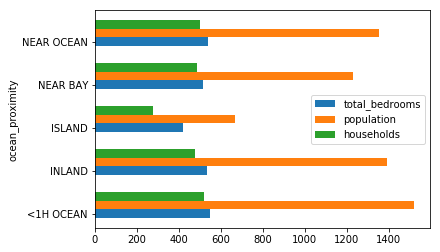

In [83]:
##한눈에 시각화!

_X = arange(len(cali_mean.index,))

plt.barh(_X, cali_mean['total_bedrooms'],0.2,label='total_bedrooms')
plt.barh(_X + 0.2, cali_mean['population'],0.2,label='population')
plt.barh(_X + 0.4, cali_mean['households'],0.2,label='households')
plt.legend()
plt.yticks(_X,['<1H OCEAN','INLAND','ISLAND','NEAR BAY','NEAR OCEAN'])
plt.ylabel('ocean_proximity')

## Subplot을 이용하여 4개의 그래프를 만들어라! 

In [84]:
## 변수들 모두 subplot을 한 눈에 알아볼 수 있게 배열 할 수 있다. 
## 4개의 dataframe형성 
colors = ['b','y','g','r','purple']


Text(0,0.5,'ocean_proximity')

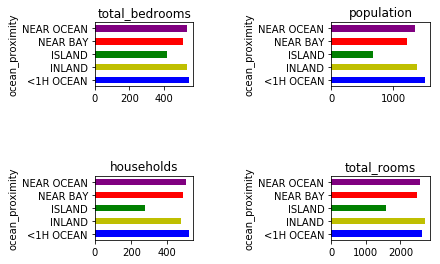

In [80]:
plt.subplot(331)
plt.barh(cali_mean.index,cali_mean['total_bedrooms'],0.5,color = colors)
plt.title('total_bedrooms')
plt.ylabel('ocean_proximity')

plt.subplot(333)
plt.barh(cali_mean.index,cali_mean['population'],0.5,color = colors)
plt.title('population')
plt.ylabel('ocean_proximity')

plt.subplot(337)
plt.barh(cali_mean.index,cali_mean['households'],0.5,color = colors)
plt.title('households')
plt.ylabel('ocean_proximity')

plt.subplot(339)
plt.barh(cali_mean.index,cali_mean['total_rooms'],0.5,color = colors)
plt.title('total_rooms')
plt.ylabel('ocean_proximity')

## Median_income 과 Median_house_value의 Scatterplot을 그려보자

Text(0.5,1,'income and house_value scatterplot')

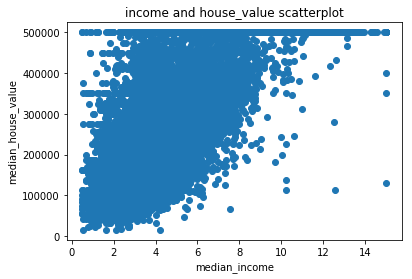

In [86]:
plt.scatter(cali['median_income'],cali['median_house_value'])
plt.ylabel('median_house_value')
plt.xlabel('median_income')
plt.title('income and house_value scatterplot')

In [88]:
##색깔을 입혀보자. 거주지역이 NEAR_BAY인 사람들과 아닌 사람들로 나눠서 보고싶다면?
cols = []
for i in cali['ocean_proximity']:
    choice = 0
    if i == 'NEAR OCEAN':
        choice = 1
        
    else:
        choice = 2
    cols.append(choice)

Text(0.5,1,'income and house_value scatterplot')

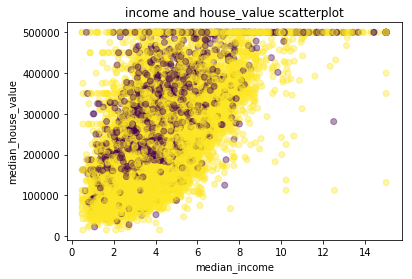

In [92]:
##방금만든 cols를 활용한다. 점들이 겹치기 때문에 투명도도 준다.(c, alpha 활용)

plt.scatter(cali['median_income'],cali['median_house_value'],alpha=0.4,c=cols)
plt.ylabel('median_house_value')
plt.xlabel('median_income')
plt.title('income and house_value scatterplot')

## 위도와 경도 자료를 활용, size는 population/100, color를 median_house value로 해서 지도를 그려보아라

Text(0,0.5,'Latitude')

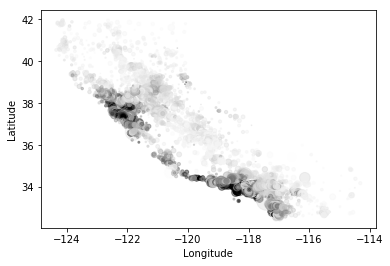

In [105]:
plt.scatter(cali['longitude'],cali['latitude'], c = cali['median_house_value'], s = cali['population']/100, alpha=0.4,cmap='Greys')
plt.xlabel('Longitude')
plt.ylabel('Latitude')